In [39]:
#import de bibliotecas e arquivos
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('CADASTRO_IES_2020.CSV', encoding='ISO-8859-1', sep=';', low_memory=False)

In [40]:
#análise exploratória
print("Análise exploratória:")
print("Total de linhas:", len(df))
print("\nResumo estatístico:")
print(df.describe())
print("\nQuantidade de valores NaN por coluna:")
print(df.isna().sum())

Análise exploratória:
Total de linhas: 2457

Resumo estatístico:
       NU_ANO_CENSO  CO_REGIAO_IES    CO_UF_IES  CO_MUNICIPIO_IES  \
count        2457.0    2457.000000  2457.000000      2.457000e+03   
mean         2020.0       2.994709    33.476190      3.365560e+06   
std             0.0       1.052941     9.622577      9.629679e+05   
min          2020.0       1.000000    11.000000      1.100023e+06   
25%          2020.0       2.000000    29.000000      2.909208e+06   
50%          2020.0       3.000000    33.000000      3.306305e+06   
75%          2020.0       4.000000    41.000000      4.106407e+06   
max          2020.0       5.000000    53.000000      5.300108e+06   

       IN_CAPITAL_IES  CO_MESORREGIAO_IES  CO_MICRORREGIAO_IES  \
count     2457.000000         2457.000000          2457.000000   
mean         0.348392            5.836793            23.398860   
std          0.476558            4.304170            18.938151   
min          0.000000            1.000000        

In [41]:
#excluir valores nulos
df.dropna(inplace=True)

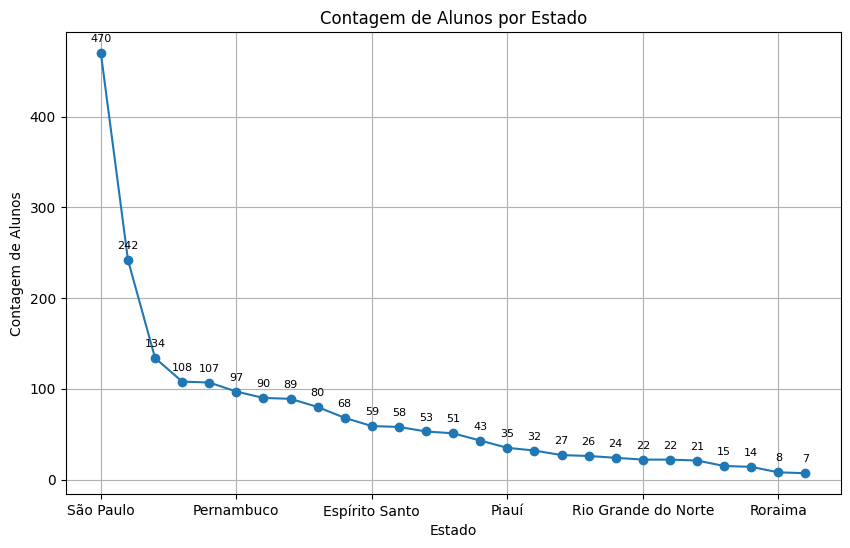

In [42]:
state_counts = df['NO_UF_IES'].value_counts()
ax = state_counts.plot(kind='line', marker='o', title='Contagem de Alunos por Estado', figsize=(10, 6))
ax.set_xlabel('Estado')
ax.set_ylabel('Contagem de Alunos')
ax.grid(True)
ax.set_axisbelow(True)

# Adicionar as marcações numéricas no topo de cada ponto
for i, v in enumerate(state_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=8, color='black')

plt.show()

In [43]:
#gerar arquivo pdf
from fpdf import FPDF
pdf = FPDF('P', 'mm', 'A4')
pdf.add_page()
pdf.output('Cadastro IES 2020.pdf')
print('pdf criado')


pdf criado


In [44]:
#adicionar e ajustar a imagem no pdf
pdf = FPDF()
pdf.add_page()
pdf.set_font('times', '', 16)
pdf.cell(w=0, h=0)
pdf.image(name='grafico.png', x=2, y=50, w=200)
pdf.output('Cadastro IES 2020.pdf')